# Naive Bayes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
salary_train=pd.read_csv('SalaryData_Train.csv')
salary_test=pd.read_csv('SalaryData_Test.csv')
salary_train.columns
salary_test.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [3]:
string_columns=['workclass','education','maritalstatus','occupation','relationship','race','sex','native']

In [4]:
salary_train.head(11)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [5]:
salary_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [6]:
print(salary_train.isnull().sum().sum())
print(salary_test.isnull().sum().sum())

0
0


In [7]:
corr = salary_train.corr()

<AxesSubplot:>

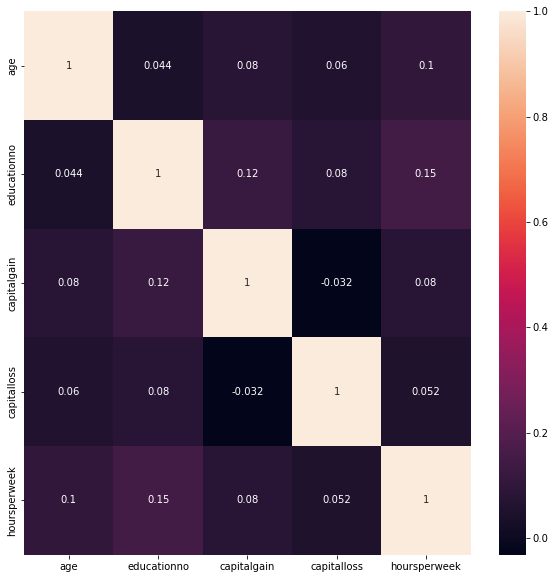

In [8]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

In [9]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()

In [10]:
for i in string_columns:
    salary_train[i]=label_encoder.fit_transform(salary_train[i])
    salary_test[i]=label_encoder.fit_transform(salary_test[i])

In [11]:
col_names=list(salary_train.columns)
train_X=salary_train[col_names[0:13]]
train_Y=salary_train[col_names[13]]
test_x=salary_test[col_names[0:13]]
test_y=salary_test[col_names[13]]

# Naive Bayes 

## Gaussian Naive Bayes

In [12]:
from sklearn.naive_bayes import GaussianNB

In [13]:
Gmodel=GaussianNB()

In [14]:
train_pred_gau=Gmodel.fit(train_X,train_Y).predict(train_X)
test_pred_gau=Gmodel.fit(train_X,train_Y).predict(test_x)

In [15]:
test_pred_gau

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' >50K', ' <=50K'],
      dtype='<U6')

In [16]:
train_acc_gau=np.mean(train_pred_gau==train_Y)
test_acc_gau=np.mean(test_pred_gau==test_y)
train_acc_gau            #0.795
test_acc_gau             #0.794

0.7946879150066402

# Multinomial Naive Bayes

In [17]:
from sklearn.naive_bayes import MultinomialNB

In [18]:
Mmodel=MultinomialNB()

In [19]:
train_pred_multi=Mmodel.fit(train_X,train_Y).predict(train_X)
test_pred_multi=Mmodel.fit(train_X,train_Y).predict(test_x)

In [20]:
train_acc_multi=np.mean(train_pred_multi==train_Y)
test_acc_multi=np.mean(test_pred_multi==test_y)

In [21]:
train_acc_multi    #0.772
test_acc_multi     #0.774

0.7749667994687915

In [22]:
print(Mmodel.predict(test_x.iloc[11:12,:]))

[' >50K']


In [23]:
test_x.iloc[11:12,:]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
11,48,2,11,9,2,6,0,4,1,3103,0,48,37
